In [11]:
import pandas as pd


In [12]:
import numpy as np



In [13]:
import matplotlib.pyplot as plt


In [14]:
%matplotlib inline


In [15]:
customers = pd.read_json(r"C:\Users\Admin\Desktop\Ateneo school stuuff\itmgt\analyze panda\dim_customer.json")
invoices = pd.read_csv(r"C:\Users\Admin\Desktop\Ateneo school stuuff\itmgt\analyze panda\fct_invoice.csv")

print(customers.head())
print(invoices.head())


    age first_name gender  id last_name
0  48.0   Nicholas      M   0    Flores
1   NaN    Jeffery      M   1      Rowe
2  57.0     Alexis      F   2    Benton
3  73.0        Amy      F   3   Johnson
4  20.0      David      M   4     Moore
  invoice_no  customer_id  category  quantity    price payment_method  \
0    I138884          229  Clothing         5  1500.40    Credit Card   
1    I317333         3433     Shoes         3  1800.51     Debit Card   
2    I127801          644  Clothing         1   300.08           Cash   
3    I173702         4900     Shoes         5  3000.85    Credit Card   
4    I337046         1089     Books         4    60.60           Cash   

  invoice_date   shopping_mall  
0     5/8/2022          Kanyon  
1   12/12/2021  Forum Istanbul  
2    9/11/2021       Metrocity  
3   16/05/2021    Metropol AVM  
4   24/10/2021          Kanyon  


Easy 1. How many unique customers are in the dataset?



In [16]:
customers['id'].nunique()



5191

Easy 2. What are the different categories of products available? How many unique categories are there?

In [19]:

categories = invoices['category'].unique()
print("Different categories of products:")
print(categories)

print("\nNumber of unique categories:")
print(invoices['category'].nunique())


Different categories of products:
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']

Number of unique categories:
8


Easy 3. Which payment method is the most popular? How many times was it used?

In [20]:
invoices['payment_method'].value_counts().head(1)


payment_method
Cash    44447
Name: count, dtype: int64

Medium 1. What are the three most popular categories, by total sales?

In [26]:
invoices['total'] = invoices['quantity'] * invoices['price']


In [27]:
invoices.groupby('category')['total'].sum().sort_values(ascending=False).head(3)


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total, dtype: float64

Medium 2: Total sales from customers over age 45

In [28]:
merged = invoices.merge(customers, left_on='customer_id', right_on='id')

merged.loc[merged['age'] > 45, 'total'].sum()


np.float64(82039768.15)

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

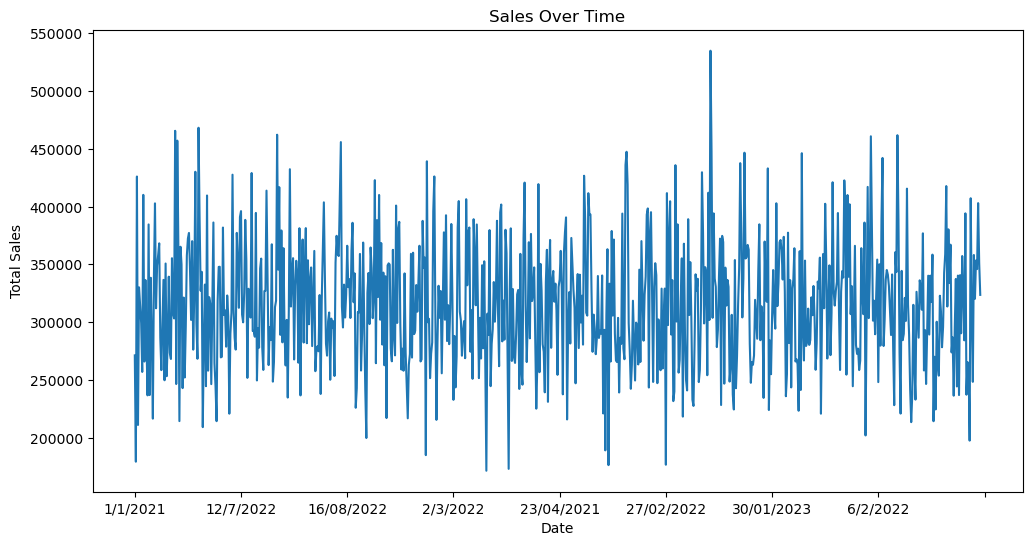

In [33]:
sales_by_date = invoices.groupby('invoice_date')['total'].sum()

plt.figure(figsize=(12,6))
sales_by_date.plot()
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()



Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [34]:
merged['age_group'] = (merged['age'] // 10) * 10
merged['age_group'] = merged['age_group'].astype(str) + "-" + (merged['age_group'] + 9).astype(str)

pivot = pd.pivot_table(
    merged,
    values='total',
    index='category',
    columns='age_group',
    aggfunc='sum',
    fill_value=0
)

pivot


age_group,10.0-19.0,20.0-29.0,30.0-39.0,40.0-49.0,50.0-59.0,60.0-69.0,70.0-79.0,80.0-89.0,nan-nan
category,,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,334012.05
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,46003764.40
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,2777362.62
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,345875.59
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,26468097.17
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,265661.04
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,23865450.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,1587210.24
